### Structure of DataFrames
* **Provences**: [Provence, Domain, Regent, Terrain, Loyalty, Taxation, Population, Magic, Castle, Capital, Position, Troops]
* **Holdings**: [Provence, Domain, Regent, Type, Level]
* **Regents**: [Regent, Full Name, Player, Class, Level, Alignment, Str, Dex, Con, Int, Wis, Cha, Insight, Deception, Persuasion, Regency Points, Gold Bars, Regency Bonus, Attitude, Lieutenants]
* **Geography**: [Provence, Neighbor, Border, Road, Caravan, Shipping]
* **Relationship**: [Regent, Other, Diplomacy, Payment, Vassalage]
* **Troops**: [Regent, Provence, Type, Cost, CR]

* **Seasons**: A dctionary of season-dataframes (to keep track of waht happened)



In [1]:
from source.regency import Regency
from source.DQNAgent import DQNAgent
from IPython.display import clear_output

Game = Regency()

for a in range(1):
    Game.random_events()
    Game.collect_regency_points()
    Game.domain_initiative()
    Game.collect_gold_bars()
    Game.maintenance_costs()

clear_output()
Game.Seasons[Game.Season]['Season']

,Regent,Player,Random Event,Regency Points,Initiative,Gold Bars,Revenue,Cost,Court
0,Sw,False,No Event,12,20,0,0,0,Dormant
1,ML,False,Intrigue,4,19,0,3,3,Bare
2,JR,False,No Event,36,19,0,9,9,Dormant
3,TF,False,Natural Event,3,17,1,2,1,Dormant
4,TBM,False,No Event,20,16,0,0,0,Dormant
5,Ch,False,Matter of Justice,22,16,0,0,0,Dormant
6,EC,False,Intrigue,35,15,0,10,10,Dormant
7,GH,False,Natural Event,11,15,5,8,3,Bare
8,MF,False,No Event,20,15,9,15,6,Average
9,CSH,False,No Event,11,14,5,8,3,Bare


C:\git\Regency\source\regency.py:843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  npc_regents_e['Rank'] = -10
C:\git\Regency\source\regency.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  npc_regents_n['Rank'] = 3
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


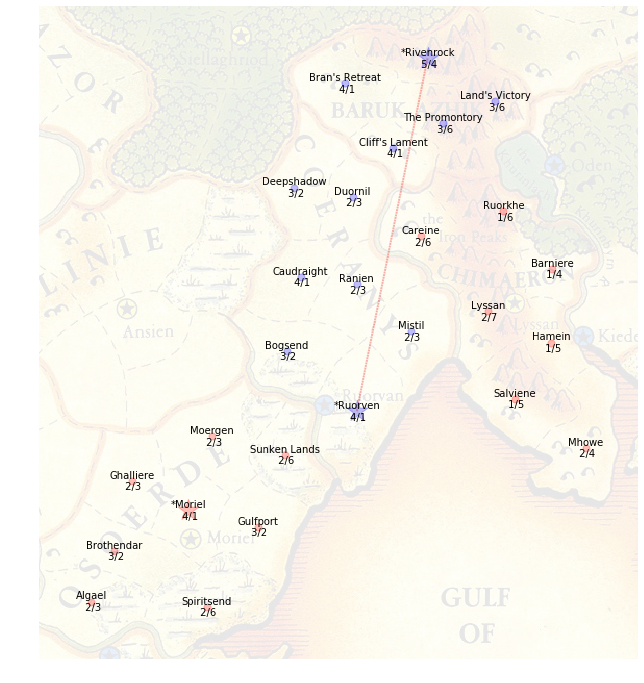

In [2]:
Game.show_map(caravans=True, map_alpha=0.1)

In [3]:
Game.random_events()
Game.collect_regency_points()
Game.domain_initiative()
Game.collect_gold_bars()
Game.maintenance_costs()

clear_output()
Game.Provences

,Provence,Domain,Region,Regent,Terrain,Loyalty,Taxation,Population,Magic,Castle,Capital,Position,Contested,Waterway
0,Bogsend,Coeranys,Eastern Marches,EC,Swamp,Average,Light,3,2,0,False,"[1543, 1985]",False,False
1,Caudraight,Coeranys,Eastern Marches,EC,Plains,Average,Light,4,1,0,False,"[1556, 1914]",False,False
2,Deepshadow,Coeranys,Eastern Marches,EC,Plains,Average,Light,3,2,0,False,"[1550, 1828]",False,False
3,Duornil,Coeranys,Eastern Marches,EC,Plains,Average,Light,2,3,0,False,"[1606, 1837]",False,False
4,Mistil,Coeranys,Eastern Marches,EC,Plains,Poor,Severe,2,3,0,False,"[1662, 1966]",False,True
5,Ranien,Coeranys,Eastern Marches,EC,Plains,Average,Light,2,3,0,False,"[1610, 1921]",False,False
6,Ruorven,Coeranys,Eastern Marches,EC,Swamp,Average,Light,4,1,0,True,"[1610, 2043]",False,True
7,Algael,Osoerde,Eastern Marches,JR,Swamp,High,Light,2,3,0,False,"[1355, 2226]",False,False
8,Brothendar,Osoerde,Eastern Marches,JR,Plains,Average,Light,3,2,0,False,"[1377, 2177]",False,False
9,Ghalliere,Osoerde,Eastern Marches,JR,Plains,High,None,2,3,0,False,"[1394, 2110]",False,False


In [4]:
Game.Seasons[Game.Season]['Season']

,Regent,Player,Random Event,Regency Points,Initiative,Gold Bars,Revenue,Cost,Court
0,JR,False,No Event,72,21,1,6,5,Dormant
1,TF,False,No Event,6,20,0,2,3,Bare
2,CoL,False,No Event,56,19,2,6,6,Bare
3,HA,False,No Event,8,19,1,2,1,Dormant
4,Ch,False,No Event,44,19,0,0,0,Dormant
5,WB,False,No Event,6,18,0,2,3,Bare
6,GH,False,No Event,22,17,8,9,6,Average
7,TCV,False,No Event,4,15,0,1,1,Dormant
8,Sw2,False,No Event,36,14,0,0,0,Dormant
9,Sw,False,No Event,24,13,0,0,0,Dormant


In [5]:
Game.Provences

,Provence,Domain,Region,Regent,Terrain,Loyalty,Taxation,Population,Magic,Castle,Capital,Position,Contested,Waterway
0,Bogsend,Coeranys,Eastern Marches,EC,Swamp,Average,Light,3,2,0,False,"[1543, 1985]",False,False
1,Caudraight,Coeranys,Eastern Marches,EC,Plains,Average,Light,4,1,0,False,"[1556, 1914]",False,False
2,Deepshadow,Coeranys,Eastern Marches,EC,Plains,Average,Light,3,2,0,False,"[1550, 1828]",False,False
3,Duornil,Coeranys,Eastern Marches,EC,Plains,Average,Light,2,3,0,False,"[1606, 1837]",False,False
4,Mistil,Coeranys,Eastern Marches,EC,Plains,Poor,Severe,2,3,0,False,"[1662, 1966]",False,True
5,Ranien,Coeranys,Eastern Marches,EC,Plains,Average,Light,2,3,0,False,"[1610, 1921]",False,False
6,Ruorven,Coeranys,Eastern Marches,EC,Swamp,Average,Light,4,1,0,True,"[1610, 2043]",False,True
7,Algael,Osoerde,Eastern Marches,JR,Swamp,High,Light,2,3,0,False,"[1355, 2226]",False,False
8,Brothendar,Osoerde,Eastern Marches,JR,Plains,Average,Light,3,2,0,False,"[1377, 2177]",False,False
9,Ghalliere,Osoerde,Eastern Marches,JR,Plains,High,None,2,3,0,False,"[1394, 2110]",False,False


In [6]:
Game.Regents

,Regent,Full Name,Player,Class,Level,Alignment,Str,Dex,Con,Int,Wis,Cha,Insight,Deception,Persuasion,Regency Points,Gold Bars,Regency Bonus,Attitude
0,EC,Eluvie Cariele,False,Fighter,2,CG,0,1,0,1,2,3,4,5,5,70,3,2,Peaceful
1,LPA,Life and Protection of Avanalae (Medhlorie Hae...,False,Priest,5,NN,0,0,1,1,3,1,1,1,3,28,8,3,Normal
2,GH,Ghorien Hiriele (Highland/Overland Traders),False,Noble,2,NN,0,1,0,1,2,3,4,5,5,22,8,1,Normal
3,Sw2,Second Swamp Mage,False,Green Hag,11,NN,4,1,3,1,2,2,1,4,2,36,0,1,Normal
4,HA,Haelyn's Aegis (Anita Maricoere),False,Priest,5,NN,0,0,1,1,3,1,1,1,3,8,1,1,Normal
5,DW,Diirk Watersold (Royal Guild of Baruk-Azhir),False,Rogue,2,NG,0,1,0,1,2,3,4,5,5,56,25,1,Normal
6,TBM,Three Brother Mages,False,Mage,9,NN,-1,2,0,3,1,0,3,0,0,40,0,1,Normal
7,EL,Elamien Lamier (Points East Trading Guild),False,Noble,2,NN,0,1,0,1,2,3,4,5,5,26,13,1,Normal
8,JR,Jaison Raenech,False,Fighter,7,LE,0,1,0,1,2,3,4,5,5,72,1,3,Aggressive
9,WM,Willaim Moergen,False,Fighter,5,CG,0,1,0,1,2,3,4,5,5,16,0,3,Normal
